# Importing Libraries

In [59]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1) XOR Gate

In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sig(x):
    return x * (1 - x)

In [61]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [62]:
def nn_xor(X, y, epochs, learning_rate, weights_hidden, weights_output):
    for i in range(epochs):
        hidden_layer_i = np.dot(X, weights_hidden)
        hidden_layer_o = sigmoid(hidden_layer_i)
        output_layer_i = np.dot(hidden_layer_o, weights_output)
        output = sigmoid(output_layer_i)

        error = y - output
        d_output = error * der_sig(output)
        error_hidden = d_output.dot(weights_output.T)
        d_hidden = error_hidden * der_sig(hidden_layer_o)

        weights_output += hidden_layer_o.T.dot(d_output) * learning_rate
        weights_hidden += X.T.dot(d_hidden) * learning_rate

    return (output)

In [63]:
np.random.seed(1)
weights_hidden = np.random.uniform(size=(2, 2))
weights_output = np.random.uniform(size=(2, 1))

learning_rate = 0.1
epochs = 100000

output = nn_xor(X, y, epochs, learning_rate, weights_hidden, weights_output)

In [64]:
prediction = []
for i in output:
    if i[0] < 0.5:
        prediction.append(0)
    else :
        prediction.append(1)
print(prediction)

[0, 1, 1, 0]


- Hence we can see that using **Neural Network**, we have predicted the output of **XOR**
accurately

# 2a) Scratch, python

## Reading the Data

In [65]:
data = pd.read_excel('Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [66]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) ']).to_numpy()
X_norm=(X-X.mean())/X.std()
y = data['Concrete compressive strength(MPa, megapascals) '].to_numpy()

In [67]:
def activation(x):
    return np.maximum(0,x)

def der_act(x):
    return np.rint(sigmoid(x))

In [68]:
def nnet(X, y, epochs, learning_rate, no_neurons, print_):
    global loss_train, n_iter
    loss_train = []
    n_iter = []
    
    np.random.seed(1)
    weights_hidden = np.random.uniform(size=(X.shape[1], no_neurons))
    weights_output = np.random.uniform(size=(no_neurons, 1))

    for i in range(epochs):
        hidden_layer_i = np.dot(X, weights_hidden)
        hidden_layer_o = activation(hidden_layer_i)
        output_layer_i = np.dot(hidden_layer_o, weights_output)
        output = activation(output_layer_i)

        error = y.reshape(y.shape[0],1) - output
        
        if print_ == 'yes':
            if i%1000==0 or i == epochs-1:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, epochs, np.sum(error*error)/y.shape[0]))
                loss_train.append(np.sum(error*error)/y.shape[0])
                n_iter.append(i)
        elif print_ == 'no':
            pass

        d_output = error * der_act(output)
        error_hidden = d_output.dot(weights_output.T)
        d_hidden = error_hidden * der_act(hidden_layer_o)

        weights_output += hidden_layer_o.T.dot(d_output) * learning_rate
        weights_hidden += X.T.dot(d_hidden) * learning_rate

    return output, weights_hidden, weights_output

In [69]:
learning_rate = 0.00001
epochs = 9000

output, weights_hidden, weights_output = nnet(X_norm, y, epochs, learning_rate, 20, 'yes')

Epoch [0/9000], Loss: 1315.7273
Epoch [1000/9000], Loss: 189.7221
Epoch [2000/9000], Loss: 166.0970
Epoch [3000/9000], Loss: 157.3694
Epoch [4000/9000], Loss: 152.9701
Epoch [5000/9000], Loss: 150.2607
Epoch [6000/9000], Loss: 149.2504
Epoch [7000/9000], Loss: 148.3255
Epoch [8000/9000], Loss: 147.4071
Epoch [8999/9000], Loss: 162.6293


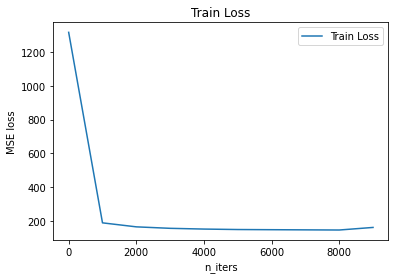

In [70]:
plt.plot(n_iter, loss_train)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

# 2a) PyTorch

In [71]:
class Net(nn.Module):
    def __init__(self,n):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_norm.shape[1], n)
        self.fc2 = nn.Linear(n, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net(20) #20 Neurons
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [72]:
scaler = StandardScaler()
train_data = scaler.fit_transform(X)

In [73]:
train_data = np.hstack((train_data, y.reshape(y.shape[0],1)))
train_data.shape

(1030, 9)

In [74]:
epochs = 100
i=0
for epoch in range(epochs):
    running_loss = 0.0
    for j, data in enumerate(train_data):
        inputs, labels = data[:-1], data[-1]
        inputs, labels = torch.tensor(inputs).float(), torch.tensor(labels).float()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    if i%10==0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(i, epochs, loss.item()))
        
    i+=1

Epoch [0/100], Loss: 1017.2509
Epoch [10/100], Loss: 390.5074
Epoch [20/100], Loss: 15.7430
Epoch [30/100], Loss: 3.6335
Epoch [40/100], Loss: 4.4573
Epoch [50/100], Loss: 4.3313
Epoch [60/100], Loss: 3.9157
Epoch [70/100], Loss: 3.5297
Epoch [80/100], Loss: 3.2271
Epoch [90/100], Loss: 3.0239


___

# 2b) Hyperparameter Optimization

In [100]:
data = pd.read_excel('Concrete_Data.xls')

In [101]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) ']).to_numpy()
X_norm=(X-X.mean())/X.std()
y = data['Concrete compressive strength(MPa, megapascals) '].to_numpy()

In [77]:
X_train, X_v, y_train, y_v = train_test_split(X_norm, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_v, y_v, test_size=0.5, random_state=42)

In [79]:
learning_rate = 0.00001
epochs = 10000
loss = []

for n in tqdm(range(10,150,10)):
    output, weights_hidden, weights_output = nnet(X_norm, y, epochs, learning_rate, n, 'no')
    
    hidden_layer_i = np.dot(X_val, weights_hidden)
    hidden_layer_o = activation(hidden_layer_i)
    output_layer_i = np.dot(hidden_layer_o, weights_output)
    output = activation(output_layer_i)
    
    error = y_val.reshape(y_val.shape[0],1) - output

    loss.append(np.sum(error*error)/y_val.shape[0])

100%|██████████| 14/14 [15:53<00:00, 68.14s/it] 


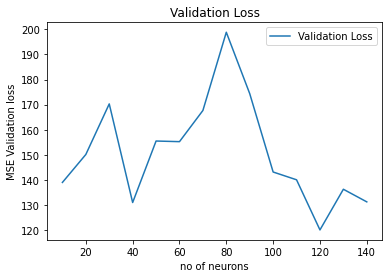

In [81]:
plt.plot(list(range(10,150,10)),loss)
plt.legend(['Validation Loss'])
plt.ylabel('MSE Validation loss')
plt.xlabel('no of neurons')
plt.title('Validation Loss')
plt.show()

In [83]:
index = loss.index(min(loss))
no_neurons_min = list(range(10,150,10))[index]

output, weights_hidden, weights_output = nnet(X_norm, y, epochs, learning_rate, no_neurons_min, 'no')

hidden_layer_i = np.dot(X_test, weights_hidden)
hidden_layer_o = activation(hidden_layer_i)
output_layer_i = np.dot(hidden_layer_o, weights_output)
output = activation(output_layer_i)

error = y_test.reshape(y_test.shape[0],1) - output

loss = np.sum(error*error)/y_test.shape[0]

print('corresponding test loss =',loss)

corresponding test loss = 105.88140004156318


# 2c) Comparision with Linear Regression

| Model | MSE Loss |
| :-: | :-: |
| **Linear Regression** | 107.25 |
| **Quadratic Regression** | 51.599 |
| **Neural Network** | 3.02 |

- **We can observe that the neural network performs significantly better than linear regression and quadratic regression.**

# 2d) python, scratch, variable layers

In [84]:
def activation(x):
    return np.maximum(0,x)

def der_act(x):
    return np.rint(sigmoid(x))

In [85]:
def Neural_Network(X, y, epochs, learning_rate, no_neurons, no_layers, print_):
    global loss_train, n_iter
    loss_train = []
    n_iter = []
    
    np.random.seed(1)
#########################################################################################################   
    weights_first = np.random.uniform(size=(X.shape[1], no_neurons))
    
    if no_layers > 1:
        weights_hidden = []
        for i in range(no_layers-1):
            weights_hidden.append(np.random.uniform(size=(no_neurons, no_neurons)))
    else:
        pass
    
    weights_output = np.random.uniform(size=(no_neurons, 1))
#########################################################################################################
    for i in range(epochs):
        hidden_layer_out = []
        
        for j in range(no_layers):
            if j == 0:
                hidden_layer_i = np.dot(X, weights_first)
                hidden_layer_out.append(activation(hidden_layer_i))
            else:
                hidden_layer_i = np.dot(hidden_layer_out[-1], weights_hidden[j-1])
                hidden_layer_out.append(activation(hidden_layer_i))
        
        output_layer_i = np.dot(hidden_layer_out[-1], weights_output)
        output = activation(output_layer_i)
#########################################################################################################
        error = y.reshape(y.shape[0],1) - output
        
        if print_ == 'yes':
            if i%1000==0 or i == epochs-1:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i, epochs, np.sum(error*error)/y.shape[0]))
                loss_train.append(np.sum(error*error)/y.shape[0])
                n_iter.append(i)
        elif print_ == 'no':
            pass

        d_output = error * der_act(output)
        
        d_hidden = []
        for k in range(no_layers,0,-1):
            if k == no_layers:
                error_hidden = d_output.dot(weights_output.T)
                d_hidden.append(error_hidden * der_act(hidden_layer_out[-1]))
            else:
                error_hidden = d_hidden[-1].dot(weights_hidden[k-1].T)
                d_hidden.append(error_hidden * der_act(hidden_layer_out[k]))
#########################################################################################################        
        
        weights_output += hidden_layer_out[-1].T.dot(d_output) * learning_rate
        
        for l in range(no_layers-2,-1,-1):
            weights_hidden[l] += hidden_layer_out[l-1].T.dot(d_hidden[-l]) * learning_rate
        
        weights_first += X.T.dot(d_hidden[-1]) * learning_rate
#########################################################################################################
    
    return output, weights_first, weights_hidden, weights_output

In [86]:
learning_rate = 0.00000001
epochs = 10000
no_neurons = 20
no_layers = 3

output, weights_first, weights_hidden, weights_output = Neural_Network(X_norm, y, epochs, learning_rate, no_neurons, no_layers, 'yes')

Epoch [0/10000], Loss: 233685.0438
Epoch [1000/10000], Loss: 205.7088
Epoch [2000/10000], Loss: 187.9811
Epoch [3000/10000], Loss: 180.3866
Epoch [4000/10000], Loss: 175.4150
Epoch [5000/10000], Loss: 171.5247
Epoch [6000/10000], Loss: 168.2449
Epoch [7000/10000], Loss: 165.3850
Epoch [8000/10000], Loss: 162.8298
Epoch [9000/10000], Loss: 160.5108
Epoch [9999/10000], Loss: 158.3977


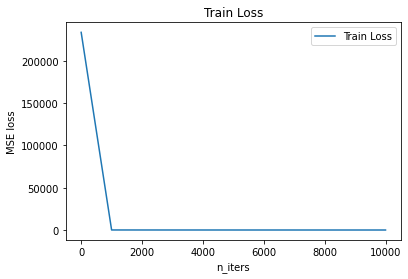

In [87]:
plt.plot(n_iter, loss_train)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss')
plt.show()

# 2d) PyTorch variable layers

In [147]:
class PyTorch_NN(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes):
        super(PyTorch_NN, self).__init__()
        
        self.input_size = input_size
        self.output_size = output_size
        
        hidden_layers = []
        for size in hidden_sizes:
            hidden_layers.extend([nn.Linear(input_size, size), nn.ReLU()])
            input_size = size
        hidden_layers.append(nn.Linear(input_size, output_size))
        self.layer = nn.Sequential(*hidden_layers)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [148]:
input_size = X_norm.shape[1]
output_size = 1
hidden_sizes = [20]*3 # variable number of hidden layers

model = PyTorch_NN(input_size, output_size, hidden_sizes)

optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

In [149]:
torch.set_default_dtype(torch.float64)

In [150]:
# X_norm = np.float32(X_norm)
data_ = torch.from_numpy(X_norm).double()
labels = torch.from_numpy(y)
labels = torch.reshape(labels, (labels.shape[0], 1))

In [151]:
num_epochs = 50000
loss_train_nn = []
n_iter = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data_)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if epoch % 5000 == 0 or epoch == num_epochs-1:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))
        loss_train_nn.append(loss.item())
        n_iter.append(epoch)

Epoch [0/50000], Loss: 1543.8766
Epoch [5000/50000], Loss: 108.4946
Epoch [10000/50000], Loss: 79.5908
Epoch [15000/50000], Loss: 66.3819
Epoch [20000/50000], Loss: 61.3081
Epoch [25000/50000], Loss: 56.7852
Epoch [30000/50000], Loss: 53.2172
Epoch [35000/50000], Loss: 51.1076
Epoch [40000/50000], Loss: 45.3958
Epoch [45000/50000], Loss: 42.7797
Epoch [49999/50000], Loss: 41.3177


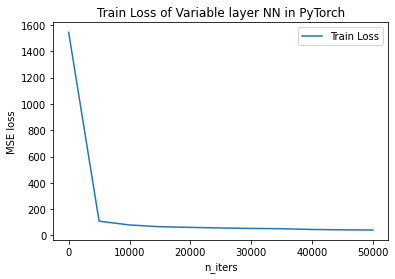

In [152]:
plt.plot(n_iter, loss_train_nn)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('n_iters')
plt.title('Train Loss of Variable layer NN in PyTorch')
plt.show()

# Depth vs Width of network

In [55]:
learning_rate = 0.00000001
epochs = 10000
no_layers = 2
loss_1 = []

for n in tqdm(range(10,50,10)):
    output, weights_first, weights_hidden, weights_output = Neural_Network(X_norm, y, epochs, learning_rate, n, no_layers, 'no')
    error = y.reshape(y.shape[0],1) - output
    loss_1.append(np.sum(error*error)/y.shape[0])

100%|██████████| 4/4 [03:05<00:00, 46.27s/it]


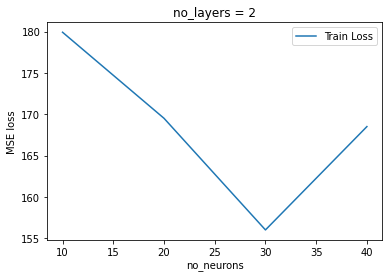

In [56]:
plt.plot(list(range(10,50,10)), loss_1)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('no_neurons')
plt.title('no_layers = 2')
plt.show()

In [57]:
learning_rate = 0.00000001
epochs = 10000
no_layers = 3
loss_2 = []

for n in tqdm(range(10,50,10)):
    output, weights_first, weights_hidden, weights_output = Neural_Network(X_norm, y, epochs, learning_rate, n, no_layers, 'no')
    error = y.reshape(y.shape[0],1) - output
    loss_2.append(np.sum(error*error)/y.shape[0])

100%|██████████| 4/4 [04:21<00:00, 65.26s/it]


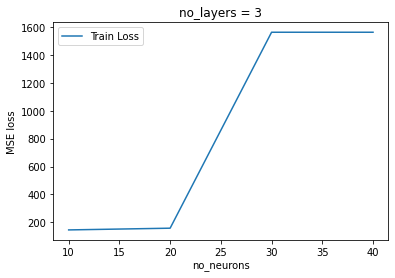

In [58]:
plt.plot(list(range(10,50,10)), loss_2)
plt.legend(['Train Loss'])
plt.ylabel('MSE loss')
plt.xlabel('no_neurons')
plt.title('no_layers = 3')
plt.show()

### Observations:
- With Cross-Validation we need to find the optimal depth and width of the fully-connected neural network for the particular problem statement in hand.
- A deeper network can assist capture more nuanced correlations between the input and output and enables the learning of more sophisticated functions. The vanishing gradient problem, where gradients get too small to properly update the weights in prior layers during training, can result from increasing the depth of the network, though.
- A wider network, on the other hand, with more neurons in each layer, can boost the model's capacity and enhance its capability to learn complex relationships. However, if the dataset is too little to support it, a broader network may also be more computationally expensive and prone to overfitting.

$$
---------Thank You---------
$$